In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
primary_csv = "../Data/clean_data.csv"

In [9]:
#Reading data file 
primary_df = pd.read_csv(primary_csv)

In [10]:
#examining data file
primary_df.head()

,Unnamed: 0,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"Biography, Crime, Drama, Thriller",English,74.0,...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
1,1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,English,NaN,...,01 Apr 2003,127 min,It's Better to Be Wanted for Murder Than Not t...,NaN,Marcel Sarmiento,2003,tt0339882,6.6,31,1
2,2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"Horror, Mystery, Thriller",English,38.0,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"Action, Adventure, Fantasy, Sci-Fi","English, German, Italian",30.0,...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,Comedy,English,49.0,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3


In [11]:
#definition in IMDB documentation suggests first country is primary country where production is HQ so for simplicity we eliminate all secondary countries.

primary_df['Single_Country'] = primary_df.Country.str.replace(r'\,.*', '')

In [12]:
primary_df.head()

,Unnamed: 0,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,...,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating,Single_Country
0,0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"Biography, Crime, Drama, Thriller",English,74.0,...,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3,Germany
1,1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,English,NaN,...,127 min,It's Better to Be Wanted for Murder Than Not t...,NaN,Marcel Sarmiento,2003,tt0339882,6.6,31,1,Canada
2,2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"Horror, Mystery, Thriller",English,38.0,...,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3,USA
3,3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"Action, Adventure, Fantasy, Sci-Fi","English, German, Italian",30.0,...,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0,USA
4,4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,Comedy,English,49.0,...,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3,USA


In [ ]:
#primary_df.set_index('Single_Country', drop=True)

In [13]:
#examining bechdel scores across countries suggests a groupby country focusing on mean of bechdel rating [rating].
countrygroups = primary_df.groupby(['Single_Country']).mean()
countrygroups

,Unnamed: 0,Metascore,Year,imdbRating,rating
Single_Country,,,,,
Argentina,3721.045455,69.857143,2004.727273,6.931818,2.454545
Australia,4429.506173,64.127660,2001.703704,6.550617,2.395062
Austria,4393.166667,74.833333,2006.833333,7.082353,2.055556
Bahamas,4390.500000,28.000000,2011.000000,5.950000,2.000000
Belgium,2704.095238,65.384615,2007.285714,6.961905,2.095238
Bosnia and Herzegovina,783.000000,71.000000,2006.000000,7.300000,3.000000
Brazil,4775.785714,70.600000,2008.892857,6.992593,2.214286
Bulgaria,5570.000000,37.000000,2012.000000,7.233333,1.000000
Burkina Faso,130.000000,NaN,2003.000000,6.900000,1.000000


In [14]:
#checking to see if some countries listed had just a few movies in database which may make them candidates for elimination in crowded comparion.
sizecountrygroups = primary_df.groupby(['Single_Country']).size()
sizecountrygroups

Single_Country
Argentina                             22
Australia                             81
Austria                               18
Bahamas                                2
Belgium                               21
Bosnia and Herzegovina                 1
Brazil                                28
Bulgaria                               3
Burkina Faso                           1
Cameroon                               1
Canada                               208
Chile                                 10
China                                 43
Colombia                               3
Costa Rica                             1
Croatia                                2
Cuba                                   1
Czech Republic                         9
Czechoslovakia                         4
Denmark                               40
Dominican Republic                     2
East Germany                           1
Ecuador                                2
Egypt                                  3
E

In [15]:
#adding a column that is count of number of movies per country to df.
countrygroups['movie_count'] = pd.Series(sizecountrygroups)
countrygroups

,Unnamed: 0,Metascore,Year,imdbRating,rating,movie_count
Single_Country,,,,,,
Argentina,3721.045455,69.857143,2004.727273,6.931818,2.454545,22
Australia,4429.506173,64.127660,2001.703704,6.550617,2.395062,81
Austria,4393.166667,74.833333,2006.833333,7.082353,2.055556,18
Bahamas,4390.500000,28.000000,2011.000000,5.950000,2.000000,2
Belgium,2704.095238,65.384615,2007.285714,6.961905,2.095238,21
Bosnia and Herzegovina,783.000000,71.000000,2006.000000,7.300000,3.000000,1
Brazil,4775.785714,70.600000,2008.892857,6.992593,2.214286,28
Bulgaria,5570.000000,37.000000,2012.000000,7.233333,1.000000,3
Burkina Faso,130.000000,NaN,2003.000000,6.900000,1.000000,1


In [ ]:
#countrygroups.drop(['country_count'], inplace=True, axis=1)

In [16]:
#identifying countries with 10 or more movies in our data
countrygroups.loc[countrygroups['movie_count'] > 9]

,Unnamed: 0,Metascore,Year,imdbRating,rating,movie_count
Single_Country,,,,,,
Argentina,3721.045455,69.857143,2004.727273,6.931818,2.454545,22
Australia,4429.506173,64.127660,2001.703704,6.550617,2.395062,81
Austria,4393.166667,74.833333,2006.833333,7.082353,2.055556,18
Belgium,2704.095238,65.384615,2007.285714,6.961905,2.095238,21
Brazil,4775.785714,70.600000,2008.892857,6.992593,2.214286,28
Canada,3981.961538,58.042373,2005.221154,6.375728,2.365385,208
Chile,3966.300000,74.571429,2008.600000,6.770000,2.100000,10
China,4501.162791,57.606061,2011.279070,6.651163,2.162791,43
Denmark,4101.525000,62.531250,2003.925000,7.022500,1.775000,40


In [17]:
#eliminating columns unnecesarry to analysis
filteredcountrygroups = countrygroups.filter(['imdbRating', 'rating', 'movie_count'])

In [18]:
#filtering new df countries with 10 or more movies in our data
filteredcountrygroups.loc[filteredcountrygroups['movie_count'] > 9]


,imdbRating,rating,movie_count
Single_Country,,,
Argentina,6.931818,2.454545,22
Australia,6.550617,2.395062,81
Austria,7.082353,2.055556,18
Belgium,6.961905,2.095238,21
Brazil,6.992593,2.214286,28
Canada,6.375728,2.365385,208
Chile,6.770000,2.100000,10
China,6.651163,2.162791,43
Denmark,7.022500,1.775000,40


In [19]:
#making permanent drop of countries with fewer than 10 movies
filteredcountrygroups.drop(filteredcountrygroups[filteredcountrygroups.movie_count < 10].index, inplace=True)

In [20]:
filteredcountrygroups

,imdbRating,rating,movie_count
Single_Country,,,
Argentina,6.931818,2.454545,22
Australia,6.550617,2.395062,81
Austria,7.082353,2.055556,18
Belgium,6.961905,2.095238,21
Brazil,6.992593,2.214286,28
Canada,6.375728,2.365385,208
Chile,6.770000,2.100000,10
China,6.651163,2.162791,43
Denmark,7.022500,1.775000,40


In [21]:
#examining where the quartiles lie in the ratings data
filteredcountrygroups.rating.quantile([0.25,0.5,0.75])

0.25    1.857048
0.50    2.070720
0.75    2.205212
Name: rating, dtype: float64

In [22]:
#creating new column that indicates where mean bechdel rating of country falls into rating quartiles.
filteredcountrygroups['quartile'] = pd.qcut(filteredcountrygroups['rating'], 4, labels=False)


In [23]:
#sorting for display purposes
filteredcountrygroups.sort_values('rating', axis=0, ascending=False, inplace=True)
filteredcountrygroups

,imdbRating,rating,movie_count,quartile
Single_Country,,,,
Argentina,6.931818,2.454545,22,3
Australia,6.550617,2.395062,81,3
India,7.469643,2.385965,57,3
South Korea,7.223810,2.380952,42,3
Canada,6.375728,2.365385,208,3
Iran,7.476190,2.285714,21,3
Germany,6.733526,2.248555,173,3
Spain,6.672857,2.234043,141,3
Brazil,6.992593,2.214286,28,3


In [24]:
#countries who are in the top quartile in terms of mean bechdel rating
topquartile = filteredcountrygroups.loc[filteredcountrygroups['quartile'] ==3]
topquartile.sort_values('rating', ascending=False)

,imdbRating,rating,movie_count,quartile
Single_Country,,,,
Argentina,6.931818,2.454545,22,3
Australia,6.550617,2.395062,81,3
India,7.469643,2.385965,57,3
South Korea,7.223810,2.380952,42,3
Canada,6.375728,2.365385,208,3
Iran,7.476190,2.285714,21,3
Germany,6.733526,2.248555,173,3
Spain,6.672857,2.234043,141,3
Brazil,6.992593,2.214286,28,3


In [25]:
#countries who are in the third quartile (second group from top group) in terms of mean bechdel rating
thirdquartile = filteredcountrygroups.loc[filteredcountrygroups['quartile'] ==2]
thirdquartile.sort_values('rating', ascending=False)

,imdbRating,rating,movie_count,quartile
Single_Country,,,,
USA,6.544913,2.177989,4725,2
China,6.651163,2.162791,43,2
UK,6.783030,2.140749,881,2
Japan,7.019723,2.114187,289,2
Chile,6.770000,2.100000,10,2
Belgium,6.961905,2.095238,21,2
Sweden,7.201587,2.095238,63,2
Poland,6.700000,2.076923,13,2


In [26]:
#countries who are in the second quartile (below the median) in terms of mean bechdel rating
secondquartile = filteredcountrygroups.loc[filteredcountrygroups['quartile'] ==1]
secondquartile.sort_values('rating', ascending=False)

,imdbRating,rating,movie_count,quartile
Single_Country,,,,
Mexico,6.690323,2.064516,31,1
Austria,7.082353,2.055556,18,1
Ireland,6.775556,2.043478,46,1
West Germany,7.225000,2.041667,24,1
Switzerland,6.850000,2.000000,10,1
Italy,7.011382,1.991870,123,1
Norway,6.740909,1.954545,22,1
France,6.881489,1.937626,497,1


In [27]:
#countries who are in the bottom quartile in terms of mean bechdel rating
bottomquartile = filteredcountrygroups.loc[filteredcountrygroups['quartile'] ==0]
bottomquartile.sort_values('rating', ascending=False)

,imdbRating,rating,movie_count,quartile
Single_Country,,,,
Hong Kong,6.786792,1.830189,53,0
Israel,6.868421,1.789474,19,0
Denmark,7.022500,1.775000,40,0
New Zealand,7.000000,1.766667,30,0
Netherlands,6.672414,1.724138,29,0
Finland,6.705882,1.705882,17,0
Russia,6.550000,1.642857,14,0
Hungary,7.096667,1.433333,30,0
Soviet Union,8.164706,1.352941,17,0


In [33]:
#overall means for all 34 countries
filteredcountrygroups.mean()

imdbRating       6.917162
rating           2.030511
movie_count    230.529412
quartile         1.500000
dtype: float64

In [34]:
#overall stnd deviations for all 34 countries
filteredcountrygroups.std()

imdbRating       0.336322
rating           0.267021
movie_count    812.146174
quartile         1.161243
dtype: float64

In [28]:
#preparing for plot, making list of bechdel rating
bechdel_score = filteredcountrygroups.rating.tolist()
bechdel_score

[2.4545454545454546,
 2.3950617283950617,
 2.3859649122807016,
 2.380952380952381,
 2.3653846153846154,
 2.2857142857142856,
 2.2485549132947975,
 2.234042553191489,
 2.2142857142857144,
 2.177989417989418,
 2.1627906976744184,
 2.140749148694665,
 2.114186851211073,
 2.1,
 2.0952380952380953,
 2.0952380952380953,
 2.076923076923077,
 2.064516129032258,
 2.0555555555555554,
 2.0434782608695654,
 2.0416666666666665,
 2.0,
 1.991869918699187,
 1.9545454545454546,
 1.937625754527163,
 1.830188679245283,
 1.7894736842105263,
 1.775,
 1.7666666666666666,
 1.7241379310344827,
 1.7058823529411764,
 1.6428571428571428,
 1.4333333333333333,
 1.3529411764705883]

In [29]:
#preparing for plot, making list of countries
countries_list = filteredcountrygroups.index.tolist()
countries_list

['Argentina',
 'Australia',
 'India',
 'South Korea',
 'Canada',
 'Iran',
 'Germany',
 'Spain',
 'Brazil',
 'USA',
 'China',
 'UK',
 'Japan',
 'Chile',
 'Belgium',
 'Sweden',
 'Poland',
 'Mexico',
 'Austria',
 'Ireland',
 'West Germany',
 'Switzerland',
 'Italy',
 'Norway',
 'France',
 'Hong Kong',
 'Israel',
 'Denmark',
 'New Zealand',
 'Netherlands',
 'Finland',
 'Russia',
 'Hungary',
 'Soviet Union']

In [ ]:
len(countries_list)

In [30]:
#Creating dictionary of 'title font' for plots
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}

In [31]:
#seeking to make US a different color than the rest of the bars in bar chart.  Maybe not the most efficient way to do this but works.
colors = ['orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'purple', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'orchid'] 
len(colors)

34

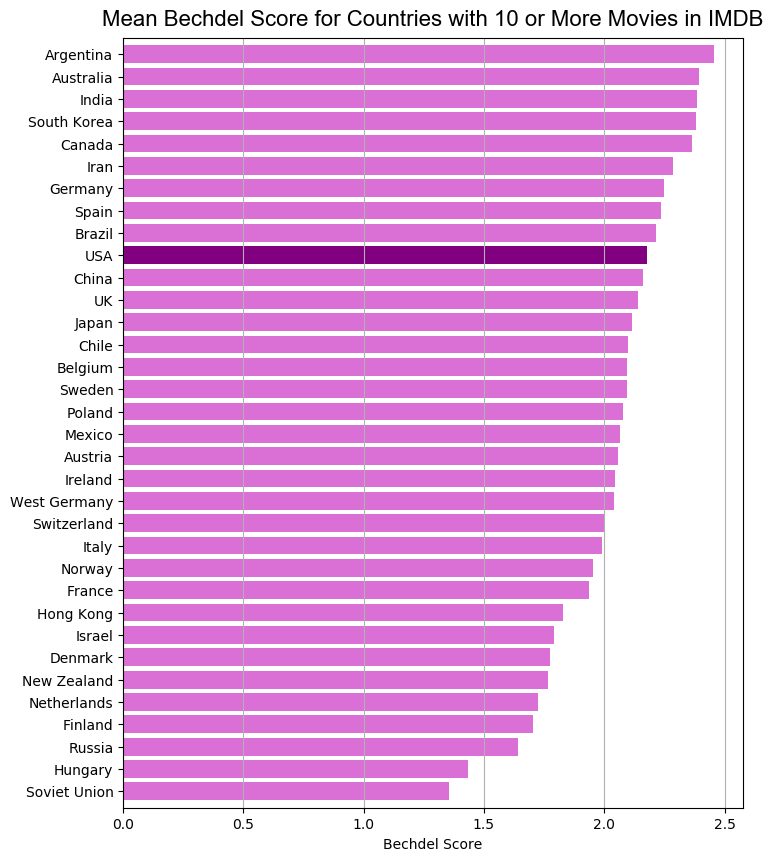

In [32]:
#horizontal bar chart to examine mean bechdel rating for countries with 10 or more movies in the IMDB/OMDB

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(countries_list))

ax.barh(y_pos, bechdel_score, align='center',
        color=colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(countries_list)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Bechdel Score')
ax.set_title('Mean Bechdel Score for Countries with 10 or More Movies in IMDB', fontdict=title_font)

plt.margins(y=0.01)
ax.xaxis.grid()
plt.savefig('bechdel_country.png')

fig = plt.gcf()
fig.set_size_inches(8, 10)

plt.show()